### What's an MNIST?

From [Wikipedia](https://en.wikipedia.org/wiki/MNIST_database)

The MNIST database (Mixed National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, NIST's complete dataset was too hard. 

More here

http://yann.lecun.com/exdb/mnist/


MNIST is the 'hello world' of computer vision.  

We're going to be using MNIST to create a Multinomial Classifier that can detect if the MNIST image shown is a member of class 0,1,2,3,4,5,6,7,8 or 9.   Susinctly, we're teaching a computer to recognize hand written digets.


Tensorflow is the package we'll be playing with today.  It has a really nice 'loader' for MNIST that will download the data for us.

In [9]:
import numpy as np

#image tools
from matplotlib import pyplot as plt
from PIL import Image

%matplotlib inline

In [1]:


from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
print ("The Training set is:")
print (mnist.train.images.shape)
print (mnist.train.labels.shape)
print ("The Test set is:")
print (mnist.test.images.shape)
print (mnist.test.labels.shape)
print ("Validation Set?")
print (mnist.validation.images.shape)
print (mnist.validation.labels.shape)


The Training set is:
(55000, 784)
(55000, 10)
The Test set is:
(10000, 784)
(10000, 10)
Validation Set?
(5000, 784)
(5000, 10)


### Tangent:  Validation Sets...

So far we've done model validation in mostly two ways:

1.  Test/Train Split

2.  K-Fold CV

Now we're introducing a third option

3.  Train/Validation/Test

Using this method of validation we split our data into 3 chunks.  

Train:  Used to train the model (duh!)
Validation:  Used to test model accuracy while we're tuning hyperparameters.
Test:  Hidden under a rock until after the model has been trained.  ONLY USED after you have your final model.


Why:  Most of the time it takes DAYS to train a deep neural net.  If we did K-Fold CV it would take that many days for each fold.  Our biggest limit in deep learning is computational power.  

As an alternative, we tune to validation and use a test set that we've never seen before at the end to measure accuracy.  If we didn't use validation, and tuned to test, we would inevitably overfit.  Information would leak through us such that our model would fit the test set well, and we'd find our 'real life' performance worse than expected.

###  Ok, so lets see one of these images already...

I'll start with a random observation in the train set.  I think 5 seems like a nice number?

In [6]:
mnist.train.images[5]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [7]:
# well, that's not a picture, it's an array.

mnist.train.images[5].shape

(784,)

The thing is, the picture has been flattened.  These are 28x28 images that have been flattened into a 1D array.  Lets re-hydrate one.


In [10]:
a = np.reshape(mnist.train.images[5], [28,28])

In [12]:
# So now we have a 28x28 matrix, where each element is an intensity level from 0 to 1.  
a.shape

(28, 28)

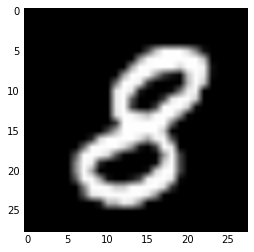

In [17]:
plt.imshow(a, cmap='Greys_r')

### Wrap up

That's all you need to know about MNIST.  Now, lets build some models.